<a href="https://colab.research.google.com/github/tombresee/DATACAMP_UML/blob/master/ENTER/notebooks/L4_Discovering_interpretable_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/ML-Challenge/week4-unsupervised-learning/blob/master/L4.Discovering%20interpretable%20features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" /></a>

In this lesson, we'll learn about a dimension reduction technique called "Non-negative matrix factorization" ("NMF") that expresses samples as combinations of interpretable parts. For example, it expresses documents as combinations of topics, and images in terms of commonly occurring visual patterns. We'll also learn to use NMF to build recommender systems that can find us similar articles to read, or musical artists that match our listening history!

# Setup

In [1]:
# Download lesson datasets
# Required if you're using Google Colab
!wget "https://github.com/ML-Challenge/week4-unsupervised-learning/raw/master/datasets.zip"
!unzip -o datasets.zip

--2020-09-26 01:01:38--  https://github.com/ML-Challenge/week4-unsupervised-learning/raw/master/datasets.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ML-Challenge/week4-unsupervised-learning/master/datasets.zip [following]
--2020-09-26 01:01:38--  https://raw.githubusercontent.com/ML-Challenge/week4-unsupervised-learning/master/datasets.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2227561 (2.1M) [application/zip]
Saving to: ‘datasets.zip’

datasets.zip        100%[===================>]   2.12M  9.70MB/s    in 0.2s    

2020-09-26 01:01:39 (9.70 MB/s) - ‘datasets.zip’ saved [2227561/2227

In [2]:
# Import utils
# We'll be using this module throughout the lesson
import utils

In [3]:
# Import dependencies
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
# and setting the size of all plots.
plt.rcParams['figure.figsize'] = [11, 7]

# Non-negative matrix factorization (NMF)

NMF stands for non-negative matrix factorization. NMF, like PCA, is a dimension reduction technique. In contrast to PCA, however, NMF models are interpretable. This means an NMF models are easier to understand, and much easier for us to explain to others. NMF can't be applied to every dataset, however. It is required that the sample features be non-negative, so greater than or equal to 0.

## Interpretable parts

NMF achieves its interpretability by decomposing samples as sums of their parts. For example, NMF decomposes documents as combinations of the common topics, and images as combinations of common patterns.

![Parts](https://github.com/ML-Challenge/week4-unsupervised-learning/blob/master/assets/4-1.png?raw=1)

We'll learn about both these examples in detail later. For now, let's focus on getting started.

## Using scikit-learn NMF

NMF is available in scikit learn, and follows the same fit/transform pattern as PCA. However, unlike PCA, the desired number of components must always be specified. NMF works both with numpy arrays and sparse arrays in the `csr_matrix` format.

Let's see an application of NMF to a toy example of a word-frequency array. In this toy dataset, there are only 4 words in the vocabulary, and these correspond to the four columns of the word-frequency array.

![Toy dataset](https://github.com/ML-Challenge/week4-unsupervised-learning/blob/master/assets/4-2.png?raw=1)

Each row represents a document, and the entries of the array measure the frequency of each word in the document using what's known as `tf-idf`. 

* `tf` is the frequency of the word in the document.
So if 10% of the words in the document are `datacamp`, then the tf of datacamp for that document is 0.1. 
* `idf` is a weighting scheme that reduces the influence of frequent words like `the`.

Let's now see how to use NMF in Python. Firstly, import NMF.

```
from sklearn.decomposition import NMF
```

Create a model, specifying the desired number of components. Let's specify 2.

```
model = NMF(n_components=2)
```

Fit the model to the samples, then use the fit model to perform the transformation.

```
model.fit(samples)

nmf_features = model.transform(samples)
```

**NMF components**

Just as PCA has principal components, NMF has components which it learns from the samples, and as with PCA, the dimension of the components is the same as the dimension of the samples. In our example, for instance, there are 2 components, and they live in 4 dimensional space, corresponding to the 4 words in the vocabulary. The entries of the NMF components are always non-negative.

**NMF features**

The NMF feature values are non-negative, as well. As we saw with PCA, our transformed data in this example will have two columns, corresponding to our two new features. The features and the components of an NMF model can be combined to approximately reconstruct the original data samples.

**Reconstrution of a sample**

If we multiply each NMF components by the corresponding NMF feature value, and add up each column, we get something very close to the original sample. So a sample can be reconstructed by multiplying the NMF components by the NMF feature values of the sample, and adding up. This calculation also can be expressed as what is known as a product of matrices. We won't be using that point of view, but that's where the matrix factorisation, or MF, in NMF comes from.

Finally, remember that NMF can only be applied to arrays of non-negative data, such as word-frequency arrays. In the next section, we construct another example by encoding collections of images as non-negative arrays. There are many other great examples as well, such as arrays encoding audio spectrograms, and arrays representing the purchase histories on e-Commerce sites.

## NMF applied to Wikipedia articles

Let's apply NMF, using the tf-idf word-frequency array of Wikipedia articles, given as a csr matrix `articles`. Here, we fit the model and transform the articles. In the next example, we'll explore the result.

In [4]:
# Import NMF
from sklearn.decomposition import NMF

In [5]:
# Create an NMF instance: model
model = NMF(n_components=6)

In [6]:
# Fit the model to articles
model.fit(utils.articles)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=6, random_state=None, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [7]:
# Transform the articles: nmf_features
nmf_features = model.transform(utils.articles)

In [8]:
# Print the NMF features
print(nmf_features)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 4.40422914e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 5.66549895e-01]
 [3.82046988e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 3.98608136e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 3.81703076e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 4.85469781e-01]
 [1.29287406e-02 1.37890610e-02 7.76340593e-03 3.34447264e-02
  0.00000000e+00 3.34489450e-01]
 [0.00000000e+00 0.00000000e+00 2.06745584e-02 0.00000000e+00
  6.04443557e-03 3.59026581e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 4.90928821e-01]
 [1.54270336e-02 1.42818476e-02 3.76640403e-03 2.37083318e-02
  2.62601947e-02 4.80728082e-01]
 [1.11735671e-02 3.13680004e-02 3.09491426e-02 6.56921915e-02
  1.96664230e-02 3.38255926e-01]
 [0.00000000e+00 0.00000000e+00 5.30728950e-01 0.0

## NMF features of the Wikipedia articles

Now we will explore the NMF features we created in the previous example.

In [9]:
# Create a pandas DataFrame: df
df = pd.DataFrame(nmf_features, index=utils.titles)

In [10]:
# Print the row for 'Anne Hathaway'
print(df.loc['Anne Hathaway'])

0    0.003845
1    0.000000
2    0.000000
3    0.575642
4    0.000000
5    0.000000
Name: Anne Hathaway, dtype: float64


In [11]:
# Print the row for 'Denzel Washington'
print(df.loc['Denzel Washington'])

0    0.000000
1    0.005601
2    0.000000
3    0.422330
4    0.000000
5    0.000000
Name: Denzel Washington, dtype: float64


When investigating the features, notice that for both actors, the NMF feature 3 has by far the highest value. This means that both articles are reconstructed using mainly the 3rd NMF component. In the next section, we'll see why: NMF components represent topics (for instance, acting!).

# NMF learns interpretable parts

In this section, we'll learn that the components of NMF represent patterns that frequently occur in the samples. Let's consider a concrete example, where scientific articles are represented by their word frequencies. There are 20000 articles, and 800 words. So the array has 800 columns.

![Articles](https://github.com/ML-Challenge/week4-unsupervised-learning/blob/master/assets/4-3.png?raw=1)

Let's fit an NMF model with 10 components to the articles.

```
from sklearn.decomposition import NMF

nmf = NMF(n_components=10)

nmf.fit(articles)
```

The 10 components are stored as the 10 rows of a 2-dimensional numpy array. The rows, or components, live in an 800-dimensional space - there is one dimension for each of the words.

![NMF Components](https://github.com/ML-Challenge/week4-unsupervised-learning/blob/master/assets/4-4.png?raw=1)

Aligning the words of our vocabulary with the columns of the NMF components allows them to be interpreted.  Choosing a component, such as this one, and looking at which words have the highest values, we see that they fit a theme: the words are 'species', 'plant', 'plants', 'genetic', 'evolution' and 'life'.

![NMF Component](https://github.com/ML-Challenge/week4-unsupervised-learning/blob/master/assets/4-6.png?raw=1)

The same happens if any other component is considered.

![NMF Component](https://github.com/ML-Challenge/week4-unsupervised-learning/blob/master/assets/4-7.png?raw=1)

So if NMF is applied to documents, then the components correspond to topics, and the NMF features reconstruct the documents from the topics.  If NMF is applied to a collection of images, on the other hand, then. the NMF components represent patterns that frequently occur in the images.
In this example, for instance, NMF decomposes images from an LCD display into the individual cells of the display.

![NMF Images](https://github.com/ML-Challenge/week4-unsupervised-learning/blob/master/assets/4-8.png?raw=1)

This example we'll investigate for in the examples. To do this, we'll need to know how to represent a collection of images as a non-negative array. 

**Grayscale images**

An image in which all the pixels are shades of gray ranging from black to white is called a grayscale image. Since there are only shades of grey, a grayscale image can be encoded by the brightness of every pixel. Representing the brightness as a number between 0 and 1, where 0 is totally black and 1 is totally white, the image can be represented as 2-dimensional array of numbers.

![NMF Images](https://github.com/ML-Challenge/week4-unsupervised-learning/blob/master/assets/4-9.png?raw=1)

Here, for example, is a grayscale photo of the moon!

![Moon](https://github.com/ML-Challenge/week4-unsupervised-learning/blob/master/assets/4-10.png?raw=1)

These 2-dimensional arrays of numbers can then be flattened by enumerating the entries. For instance, we could read-off the values row-by-row, from left-to-right, and from top-to-bottom.

![Moon](https://github.com/ML-Challenge/week4-unsupervised-learning/blob/master/assets/4-12.png?raw=1)

The grayscale image is now represented by a flat array of non-negative numbers.

**Encoding a collection of images**

A collection of grayscale images of the same size can thus be encoded as a 2-dimensional
array, in which each row represents an image as a flattened array, and each column represents a pixel. Viewing the images as samples, and the pixels as features, we see that the data is arranged similarly to the word frequency array. 

![Collection](https://github.com/ML-Challenge/week4-unsupervised-learning/blob/master/assets/4-13.png?raw=1)

Indeed, the entries of this array are non-negative, so NMF can be used to learn the parts of the images.

**Visualizing samples**

It's difficult to visualize an image by just looking at the flattened array. To recover the image, use the reshape method of the sample, specifying the dimensions of the original image as a tuple. This yields the 2-dimensional array of pixel brightnesses.

```
bitmap = sample.reshape((2,3))
```

To display the corresponding image, import `pyplot`, and pass the 2-dimensional array to the plt dot `imshow` function.

```
from matplotlib import pyplot as plt

plt.imshow(bitmap, cmap='gray', interpolation='nearest')
plt.show()
```

## NMF learns topics of documents

We learned that when NMF is applied to documents, the components correspond to topics of documents, and the NMF features reconstruct the documents from the topics. Let's verify this for the NMF model that we built earlier using the Wikipedia articles. Previously, we saw that the 3rd NMF feature value was high for the articles about actors Anne Hathaway and Denzel Washington. In this example, let's identify the topic of the corresponding NMF component.

In [12]:
# Create a DataFrame: components_df
components_df = pd.DataFrame(model.components_, columns=utils.words)

In [13]:
# Print the shape of the DataFrame
print(components_df.shape)

(6, 13125)


In [14]:
# Select row 3: component
component = components_df.iloc[3]

In [15]:
# Print result of nlargest
print(component.nlargest())

film       0.627951
award      0.253162
starred    0.245313
role       0.211476
actress    0.186420
Name: 3, dtype: float64


Take a moment to recognise the topic that the articles about Anne Hathaway and Denzel Washington have in common

## Explore the LED digits dataset

In the following examples, we'll use NMF to decompose grayscale images into their commonly occurring patterns. Firstly, we'll explore the image dataset and see how it is encoded as an array. We are given 100 images as a 2D array 'leds', where each row represents a single 13x8 image. The images in our dataset are pictures of a LED digital display.

In [16]:
# Select the 0th row: digit
digit = utils.leds[0,:]

In [17]:
# Print digit
print(digit)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


In [18]:
# Reshape digit to a 13x8 array: bitmap
bitmap = digit.reshape(13,8)

In [19]:
# Print bitmap
print(bitmap)

[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


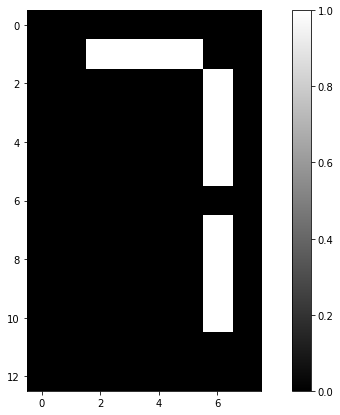

In [20]:
# Use plt.imshow to display bitmap
plt.imshow(bitmap, cmap='gray', interpolation='nearest')
plt.colorbar()
plt.show()

## NMF learns the parts of images

Now let's use what we've learned about NMF to decompose the digits dataset.

In [21]:
def show_as_image(digit):
    bitmap = digit.reshape((13, 8))
    plt.figure()
    plt.imshow(bitmap, cmap='gray', interpolation='nearest')
    plt.colorbar()
    plt.show()

In [22]:
# Create an NMF model: model
model = NMF(n_components=7)

In [23]:
# Apply fit_transform to samples: features
features = model.fit_transform(utils.leds)

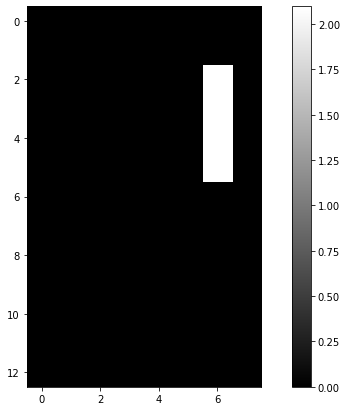

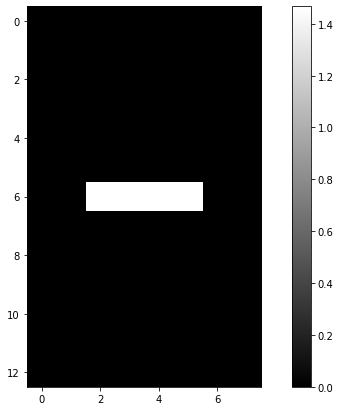

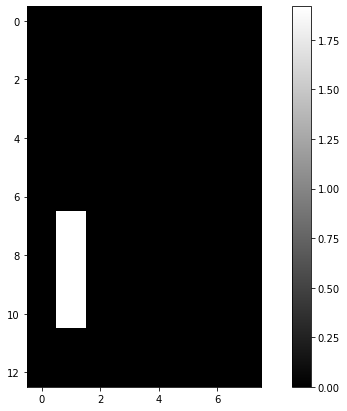

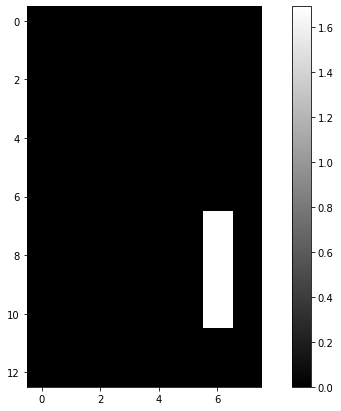

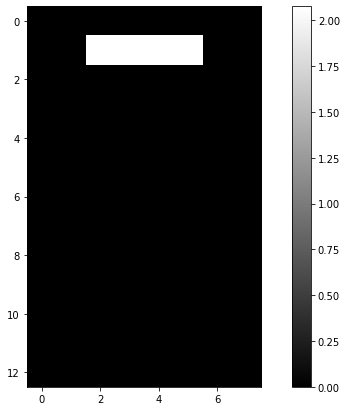

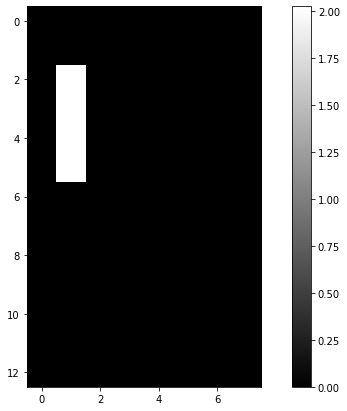

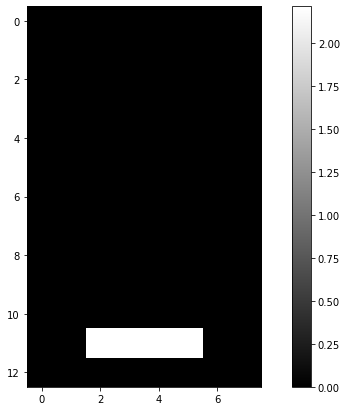

In [24]:
# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)

In [25]:
# Assign the 0th row of features: digit_features
digit_features = features[0,:]

In [26]:
# Print digit_features
print(digit_features)

[4.76823559e-01 0.00000000e+00 0.00000000e+00 5.90605054e-01
 4.81559442e-01 0.00000000e+00 7.37546142e-16]


Take a moment to look through the plots and notice how NMF has expressed the digit as a sum of the components!

## PCA doesn't learn parts

Unlike NMF, PCA doesn't learn the parts of things. Its components do not correspond to topics (in the case of documents) or to parts of images, when trained on images. Let's verify this by inspecting the components of a PCA model fit to the dataset of LED digit images from the previous example. The images are available as a 2D array `leds`. Also available is a modified version of the `show_as_image()` function which colors a pixel red if the value is negative.

In [27]:
def show_as_image(vector):
    """
    Given a 1d vector representing an image, display that image in 
    black and white.  If there are negative values, then use red for 
    that pixel.
    """
    bitmap = vector.reshape((13, 8))  # make a square array
    bitmap /= np.abs(vector).max()  # normalise
    bitmap = bitmap[:,:,np.newaxis]
    rgb_layers = [np.abs(bitmap)] + [bitmap.clip(0)] * 2
    rgb_bitmap = np.concatenate(rgb_layers, axis=-1)
    plt.imshow(rgb_bitmap, interpolation='nearest')
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [28]:
# Import PCA
from sklearn.decomposition import PCA

In [29]:
# Create a PCA instance: model
model = PCA(n_components=7)

In [30]:
# Apply fit_transform to samples: features
features = model.fit_transform(utils.leds)

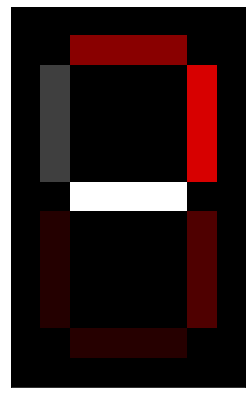

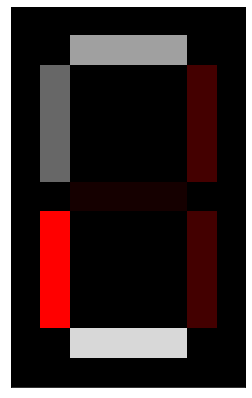

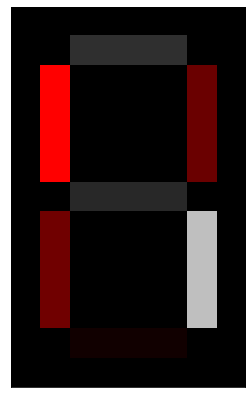

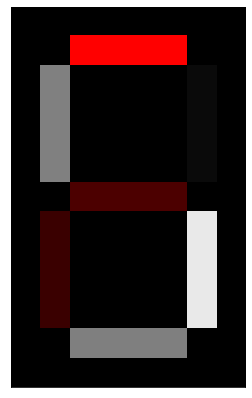

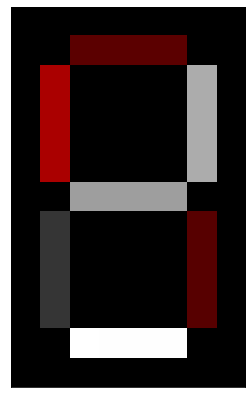

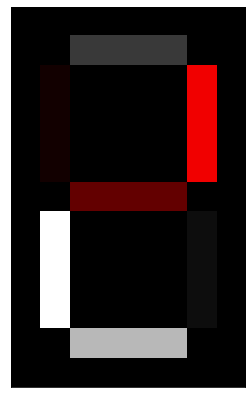

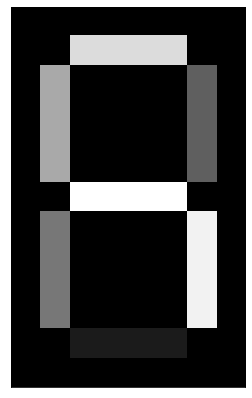

In [31]:
# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)

Notice that the components of PCA do not represent meaningful parts of images of LED digits!

# Building recommender systems using NMF

Suppose that we are engineers at a large online newspaper. We've been given the task of recommending articles that are similar to the article currently being read by a customer. Given an article, how can we find articles that have similar topics? In this section, we'll learn how to solve this problem, and others like it, by using NMF.

**Strategy**

Our strategy for solving this problem is to apply NMF to the word-frequency array of the articles, and to use the resulting NMF features. We learned in the previous sections these NMF features describe the topic mixture of an article. So similar articles will have similar NMF features. But how can two articles be compared using their NMF features? Before answering this question, let's set the scene by doing the first step.

We are given a word frequency array articles corresponding to the collection of newspaper articles in question. Import NMF, create the model, and use the fit_transform method to obtain the transformed articles.

```
from sklearn.decomposition import NMF

nmf = NMF(n_components=6)

nmf_features = nmf.fit_transform(articles)
```

Now we've got NMF features for every article, given by the columns of the new array. Now we need to define how to compare articles using their NMF features.

**Version of articles**

Similar documents have similar topics, but it isn't always the case that the NMF feature values are exactly the same. For instance, one version of a document might use very direct language, whereas other versions might interleave the same content with meaningless chatter.

![Chatter](https://github.com/ML-Challenge/week4-unsupervised-learning/blob/master/assets/4-14.png?raw=1)

Meaningless chatter reduces the frequency of the topic words overall, which reduces the values of the NMF features representing the topics. However, on a scatter plot of the NMF features, all these versions lie on a single line passing through the origin.

![Scatter plot](https://github.com/ML-Challenge/week4-unsupervised-learning/blob/master/assets/4-15.png?raw=1)

**Cosine similarity**

For this reason, when comparing two documents, it's a good idea to compare these lines. We'll compare them using what is known as the cosine similarity, which uses the angle between the two lines.

![Cosine](https://github.com/ML-Challenge/week4-unsupervised-learning/blob/master/assets/4-16.png?raw=1)

Higher values indicate greater similarity. The technical definition of the cosine similarity is out the scope of this lesson, but we've already gained an intuition.

**Calculating the cosine similarities**

Let's see now how to compute the cosine similarity. Firstly, import the normalize function, and apply it to the array of all NMF features.

```
from sklearn.preprocessing import normalize

norm_features = normalize(nmf_features)
```

Now select the row corresponding to the current article, and pass it to the dot method of the array of all normalized features. This results in the cosine similarities.

```
current_article = norm_features[23, :] # if has index 23

similarities = norm_features.dot(current_article)
```

With the help of a pandas DataFrame, we can label the similarities with the article titles. Start by importing pandas.

```
import pandas as pd
```

After normalizing the NMF features, create a DataFrame whose rows are the normalized features, using the titles as an index.

```
df = pd.DataFrame(norm_features, index=titles)
```

Now use the `.loc()` method of the dataframe to select the normalized feature values for the current article, using its title 'Dog bites man'.

```
current_article = df.loc['Dog bites man']
```

Calculate the cosine similarities using the `.dot()` method of the dataframe.

```
similarities = df.dot(current_article)
```

Finally, use the nlargest method of the resulting pandas Series to find the articles with the highest cosine similarity.

```
print(similarities.nlargest())
```
| Article                        | Similarity |
| ------------------------------ | ---------: |
| Dog Bites man                  | 1.000000   |
| Hound mauls cat                | 0.979946   |
| Pets go wild!                  | 0.979708   |
| Dachshunds are dangerous       | 0.949641   |
| Our streets are no longer safe | 0.900474   |

We see that all of them are concerned with 'domestic animals' and/or 'danger'!

## Which articles are similar to 'Cristiano Ronaldo'?

We learned how to use NMF features and the cosine similarity to find similar articles. Let's apply this to our NMF model for popular Wikipedia articles, by finding the articles most similar to the article about the footballer Cristiano Ronaldo.

In [32]:
# Perform the necessary imports
from sklearn.preprocessing import normalize

In [33]:
# Normalize the NMF features: norm_features
norm_features = normalize(nmf_features)

In [34]:
# Create a DataFrame: df
df = pd.DataFrame(norm_features, index=utils.titles)

In [35]:
# Select the row corresponding to 'Cristiano Ronaldo': article
article = df.loc['Cristiano Ronaldo']

In [36]:
# Compute the dot products: similarities
similarities = df.dot(article)

In [37]:
# Display those with the largest cosine similarity
print(similarities.nlargest())

Cristiano Ronaldo                1.000000
Franck Ribéry                    0.999972
Radamel Falcao                   0.999942
Zlatan Ibrahimović               0.999942
France national football team    0.999923
dtype: float64


## Recommend musical artists part I

In this example and the next, we'll use what we've learned about NMF to recommend popular music artists! We are given a sparse array `artists`, the rows correspond to artists and the column to users. The entries give the number of times each artist was listened to by each user.

In this example, we'll build a pipeline and transform the array into normalized NMF features. The first step in the pipeline, `MaxAbsScaler`, transforms the data so that all users have the same influence on the model, regardless of how many different artists they've listened to. In the next example, we'll use the resulting normalized NMF features for recommendation!

In [38]:
# Perform the necessary imports
from sklearn.decomposition import NMF
from sklearn.preprocessing import Normalizer, MaxAbsScaler
from sklearn.pipeline import make_pipeline

In [39]:
# Create a MaxAbsScaler: scaler
scaler = MaxAbsScaler()

In [40]:
# Create an NMF model: nmf
nmf = NMF(n_components=20)

In [41]:
# Create a Normalizer: normalizer
normalizer = Normalizer()

In [42]:
# Create a pipeline: pipeline
pipeline = make_pipeline(scaler, nmf, normalizer)

In [43]:
# Apply fit_transform to artists: norm_features
norm_features = pipeline.fit_transform(utils.artists)

Now that we've computed the normalized NMF features, we'll use them in the next example to recommend musical artists!

## Recommend musical artists part II

Suppose we are big fans of Dr. Dre - which other musicial artists might we like? Let's use the NMF features from the previous example and the cosine similarity to find similar musical artists. The names of the musical artists are available as the list `artist_names`.

In [44]:
# Create a DataFrame: df
df = pd.DataFrame(norm_features, index=utils.artist_names)

In [45]:
# Select row of 'Dr. Dre': artist
artist = df.loc['Dr. Dre']

In [46]:
# Compute cosine similarities: similarities
similarities = df.dot(artist)

In [47]:
# Display those with highest cosine similarity
print(similarities.nlargest())

Dr. Dre     1.000000
50 Cent     0.930425
Ludacris    0.901937
Eminem      0.890986
2Pac        0.879969
dtype: float64


---
**[Week 4 - Unsupervised Learning](https://radu-enuca.gitbook.io/ml-challenge/unsupervised-learning)**

*Have questions or comments? Visit the ML Challenge Mattermost Channel.*